In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the train and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### Inside Data Analysis

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.shape

(891, 12)

In [6]:
test_df.shape

(418, 11)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Merge train and test data for combine analysis

In [9]:
# Combine the two datasets
df = pd.merge(train_df, test_df, how='outer')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


#### Check target column - Binary Classification

In [11]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [12]:
df['Survived'].unique()

array([ 0.,  1., nan])

In [13]:
# check the data based on target column
df[df.Survived.notnull()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing value Analysis


In [14]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [15]:
def show_nan_value(df):
    for c in df.columns:
        lst = df[c].isnull().sum()/len(df)*100
        print(c, ":", df[c].count(), "(","{:.2f}".format(lst),"%)")

In [16]:
show_nan_value(df)

PassengerId : 1309 ( 0.00 %)
Survived : 891 ( 31.93 %)
Pclass : 1309 ( 0.00 %)
Name : 1309 ( 0.00 %)
Sex : 1309 ( 0.00 %)
Age : 1046 ( 20.09 %)
SibSp : 1309 ( 0.00 %)
Parch : 1309 ( 0.00 %)
Ticket : 1309 ( 0.00 %)
Fare : 1308 ( 0.08 %)
Cabin : 295 ( 77.46 %)
Embarked : 1307 ( 0.15 %)


###### 77% data is missing in Cabin column. We dont get much information on this column so we will drop this column

In [17]:
# drop the column
df.drop(columns=['Cabin'], inplace=True)

In [18]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

###### Embarked missing data

Embarked feature contains two missing values. There are only 3 unique values for this feature: ['C', 'Q', 'S']. Let's fill it with the most frequent values: 'S'.

In [19]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [20]:
df['Embarked'].fillna("S", inplace=True)

In [21]:
df["Embarked"].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [22]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
dtype: int64

###### Fare missing data

In [23]:
df['Fare'].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: Fare, Length: 281, dtype: int64

In [24]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [25]:
# Thomas travelled in 3rd class. Let's find out the median value on the entire dataset:
df.groupby('Pclass')['Fare'].median()


Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [26]:
df[df['Pclass']==3]['Fare'].median()

8.05

In [27]:
# fill in the missing value with median
df['Fare'].fillna(df[df['Pclass']==3]['Fare'].median(), inplace=True)

In [28]:
df[df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [29]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

### Age

- 20% of the values are missing
- Age is normally(almost) distributed


In [30]:
df['Age'].isnull().sum()

263

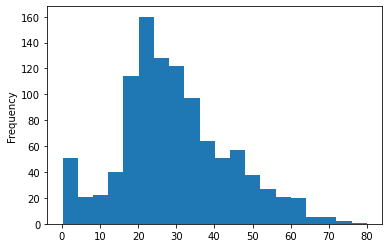

In [31]:
df['Age'].plot(kind='hist',bins=20);

<AxesSubplot:ylabel='Density'>

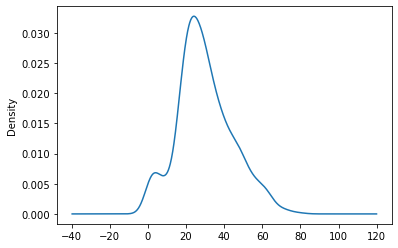

In [32]:
df['Age'].plot(kind='kde')

In [33]:
print("Mean : {:.2f}".format(df['Age'].mean()))
print("Standard Deviation : {:.2f}".format(df['Age'].std()))

Mean : 29.88
Standard Deviation : 14.41


In [34]:
p_age = np.random.randint(df['Age'].mean() - df['Age'].std(), df['Age'].mean() + df['Age'].std(), 263)

In [35]:
df['Age'][df['Age'].isnull()]

5      NaN
17     NaN
19     NaN
26     NaN
28     NaN
        ..
1299   NaN
1301   NaN
1304   NaN
1307   NaN
1308   NaN
Name: Age, Length: 263, dtype: float64

In [36]:
df['Age'][df['Age'].isnull()] = p_age

In [37]:
df['Age'].isnull().sum()

0

In [38]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

### Exploratory Data Analysis

Let's take each column and try to find out if the input column has any impact on the "Survived" column.

In [39]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

PassengerId - There will be no impact in the output column due to PassengerId.

Survived - this is output column.

###### Pclass

In [40]:
# Pclass
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [41]:
df[df['Pclass'] == 1]["Survived"].value_counts()

1.0    136
0.0     80
Name: Survived, dtype: int64

In [42]:
df[df['Pclass'] == 2]["Survived"].value_counts()

0.0    97
1.0    87
Name: Survived, dtype: int64

In [43]:
df[df['Pclass'] == 3]["Survived"].value_counts()

0.0    372
1.0    119
Name: Survived, dtype: int64

In [44]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

here we can say 

-- if you are Pclass = 1 then your survival chances are 62%

-- if you are Pclass = 2 then your survival chances are 47%

-- if you are Pclass = 3 then your survival chances are 24%

here we can see there is correlation between "Pclass" and "Survived" column


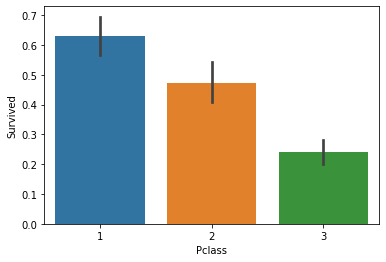

In [45]:
sns.barplot(x=df['Pclass'], y=df['Survived']);

###### Gender

In [46]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

A man's chances of survival are less and a woman's chances of survival are higher.

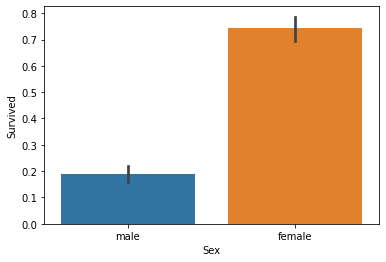

In [47]:
sns.barplot(x=df['Sex'], y=df['Survived']);

In [48]:
df[df['Sex'] == "male"]["Survived"].value_counts()

0.0    468
1.0    109
Name: Survived, dtype: int64

In [49]:
df[df['Sex'] == "female"]["Survived"].value_counts()

1.0    233
0.0     81
Name: Survived, dtype: int64

###### Embarked

In [50]:
df["Embarked"].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [51]:
df[df['Embarked'] == "S"]["Survived"].value_counts()

0.0    427
1.0    219
Name: Survived, dtype: int64

In [52]:
df[df['Embarked'] == "C"]["Survived"].value_counts()

1.0    93
0.0    75
Name: Survived, dtype: int64

In [53]:
df[df['Embarked'] == "Q"]["Survived"].value_counts()

0.0    47
1.0    30
Name: Survived, dtype: int64

In [54]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

The ship started its voyage at Southampton, England. The Titanic made its first stop at Cherbourg, France. The Titanic made its second stop at Queenstown (Cobh), Ireland. 

In [55]:
#Cherbourg city has higher chances of survival, compare other two cities.

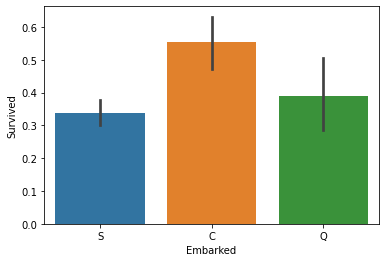

In [56]:
sns.barplot(x=df['Embarked'], y=df['Survived']);

######  Age


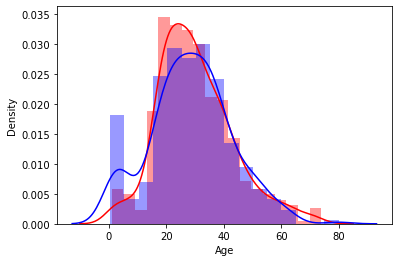

In [57]:
sns.distplot(df['Age'][df['Survived'] == 0], color='red');
sns.distplot(df['Age'][df['Survived'] == 1], color = 'blue');

Here we can see correlation between age and survived. Less and old age survival changes are higher.

###### Fare

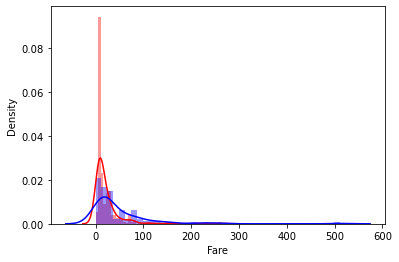

In [58]:
sns.distplot(df['Fare'][df['Survived'] == 0], color='red');
sns.distplot(df['Fare'][df['Survived'] == 1], color = 'blue');

here we can see correlation between fare and suvived columns. High fair survival chances is higher  

In [59]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

###### SibSp and Parch (sibling and Parent child) : combine these two column and create one column Family

In [60]:
df['family'] = df['SibSp'] + df['Parch'] + 1

In [61]:
df['family'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: family, dtype: int64

In [62]:
df.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [63]:
def fun_cal(num):
    if num == 1:
        return "alone"
    elif num > 1 and num < 5:
        return "medium"
    else:
        return "large"

In [64]:
df['family_size'] = df["family"].apply(fun_cal)

In [65]:
df['family_size'].value_counts()

alone     790
medium    437
large      82
Name: family_size, dtype: int64

Now we can drop "SibSp", "Parch" and "family" columns

In [66]:
df.drop(columns=['SibSp', 'Parch', 'family'], inplace=True)

In [67]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,medium
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,medium


In [68]:
# PassengerId = df['PassengerId'].values

In [69]:
# PassengerId = df['PassengerId'].values
# df.drop(columns = ['Ticket', 'Name'], inplace= True)

In [70]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
Ticket           0
Fare             0
Embarked         0
family_size      0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   Ticket       1309 non-null   object 
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   object 
 9   family_size  1309 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 112.5+ KB


#### Label Encoding

Preprocess Categorical Features
If we take a look at the output above, we can see that there are some features like ‘Sex’, ‘Embarked’ and 'family_size' that are not numerical, they are categorical. Machine learning algorithms expect to work with numerical values, so these categorical features should be transformed. One of the most popular categorical transformations is called ‘One-hot encoding’ as below.

In [72]:
df.shape

(1309, 10)

In [73]:
# Non-ordered features transformation
df = pd.get_dummies(df, columns = ['Pclass', 'Sex', 'Embarked', 'family_size'], drop_first=True)

In [74]:
df.shape

(1309, 13)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         1309 non-null   int64  
 1   Survived            891 non-null    float64
 2   Name                1309 non-null   object 
 3   Age                 1309 non-null   float64
 4   Ticket              1309 non-null   object 
 5   Fare                1309 non-null   float64
 6   Pclass_2            1309 non-null   uint8  
 7   Pclass_3            1309 non-null   uint8  
 8   Sex_male            1309 non-null   uint8  
 9   Embarked_Q          1309 non-null   uint8  
 10  Embarked_S          1309 non-null   uint8  
 11  family_size_large   1309 non-null   uint8  
 12  family_size_medium  1309 non-null   uint8  
dtypes: float64(3), int64(1), object(2), uint8(7)
memory usage: 80.5+ KB


In [76]:
df.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_large,family_size_medium
0,1,0.0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,1,1,0,1,0,1
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,0,0,0,0,0,1
2,3,1.0,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,0,0,0,1,0,1
4,5,0.0,"Allen, Mr. William Henry",35.0,373450,8.0500,0,1,1,0,1,0,0


In [77]:
df.columns.values

array(['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Fare',
       'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'family_size_large', 'family_size_medium'], dtype=object)

In [78]:
train_dt = df[df.Survived.notnull()]
test_dt = df[df.Survived.isnull()]

In [79]:
PassengerId = test_dt['PassengerId'].values

In [80]:
train_dt.drop(columns = ['Ticket', 'PassengerId', 'Name'], inplace= True)
test_dt.drop(columns = ['Ticket', 'PassengerId', 'Name', 'Survived'], inplace= True)

In [81]:
# # Create the (X, y) training vectors to be injected in ours classifiers
# X_train = df[df.Survived.notnull()].drop(['Survived'], axis=1)
# y_train = df[df.Survived.notnull()]['Survived']

In [82]:
train_dt.shape

(891, 10)

In [83]:
test_dt.shape

(418, 9)

In [84]:
train_dt.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_large,family_size_medium
0,0.0,22.0,7.2500,0,1,1,0,1,0,1
1,1.0,38.0,71.2833,0,0,0,0,0,0,1
2,1.0,26.0,7.9250,0,1,0,0,1,0,0
3,1.0,35.0,53.1000,0,0,0,0,1,0,1
4,0.0,35.0,8.0500,0,1,1,0,1,0,0


In [85]:
test_dt.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_large,family_size_medium
891,34.5,7.8292,0,1,1,1,0,0,0
892,47.0,7.0000,0,1,0,0,1,0,1
893,62.0,9.6875,1,0,1,1,0,0,0
894,27.0,8.6625,0,1,1,0,1,0,0
895,22.0,12.2875,0,1,0,0,1,0,1


In [86]:
train_dt.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'family_size_large', 'family_size_medium'],
      dtype='object')

#### Model Building

In [87]:
# import the metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [88]:
# Split the data into independent and dependent variables

X = train_dt.drop(['Survived'], axis = 1)
y = train_dt['Survived']

In [89]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

###### ## Normalization

It is recommended to perform some type of scaling on numerical features. It is used to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [90]:
# Scale the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [91]:
X_train.shape

(712, 9)

In [92]:
X_test.shape

(179, 9)

Now as the data is ready we will apply different machine learning algorithms to check the performance.


###### LogisticRegression

Logistic Regression Train Score 0.8103932584269663
Logistic Regression Test Score 0.7932960893854749
**************************************************
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       102
         1.0       0.80      0.69      0.74        77

    accuracy                           0.79       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

**************************************************


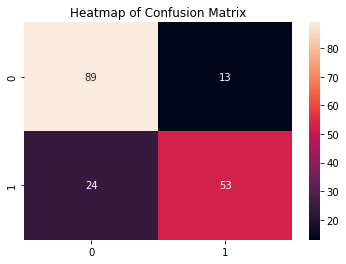

In [93]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)
prediction_lr = lr.predict(X_test)
# accuracy_score(y_test, prediction_lr)

print("Logistic Regression Train Score",lr.score(X_train, y_train))
print("Logistic Regression Test Score",lr.score(X_test, y_test))
print("*****"*10)

print(classification_report(y_test, prediction_lr))
print("*****"*10)


cm = confusion_matrix(y_test, prediction_lr )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

###### Decision Tree

Decision Tree Train Score 0.9452247191011236
Decision Tree Test Score 0.7374301675977654
**************************************************
              precision    recall  f1-score   support

         0.0       0.74      0.84      0.79       102
         1.0       0.74      0.60      0.66        77

    accuracy                           0.74       179
   macro avg       0.74      0.72      0.72       179
weighted avg       0.74      0.74      0.73       179

**************************************************


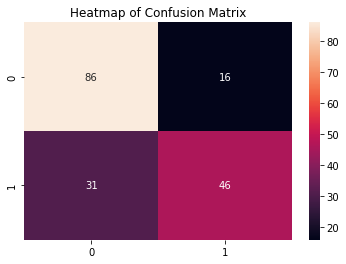

In [94]:

from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=10)
dt = dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)
y_train_pred_dt = dt.predict(X_train)

# print("Train Score",dt.score(X_train, y_train))
# print("Test Score",dt.score(X_test, y_test))

print("Decision Tree Train Score",accuracy_score(y_train, y_train_pred_dt))
print("Decision Tree Test Score",accuracy_score(y_test, y_pred_dt))
print("*****"*10)

print(classification_report(y_test, y_pred_dt))
print("*****"*10)

cm = confusion_matrix(y_test, y_pred_dt )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

###### Random Forest

Random Forest Train Score 0.8637640449438202
Random Forest Test Score 0.7988826815642458
**************************************************
              precision    recall  f1-score   support

         0.0       0.76      0.95      0.84       102
         1.0       0.90      0.60      0.72        77

    accuracy                           0.80       179
   macro avg       0.83      0.77      0.78       179
weighted avg       0.82      0.80      0.79       179

**************************************************


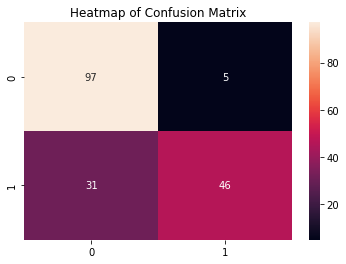

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(min_samples_split=30)
rf.fit(X_train,y_train)
predictions_rf =rf.predict(X_test)

print("Random Forest Train Score",rf.score(X_train, y_train))
print("Random Forest Test Score",rf.score(X_test, y_test))
print("*****"*10)

print(classification_report(y_test, predictions_rf))
print("*****"*10)

cm = confusion_matrix(y_test, predictions_rf )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

##### Model tuning and evaluating the performance

###### Hyperparameter tuning with random forest

In [96]:
params={'max_depth':[10,20,30,40],
              'n_estimators':[50,100,125,150,200],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf': [2,4,8,12,16],
              }

In [97]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3 ,random_state = 23)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(min_samples_split=30),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40],
                                        'min_samples_leaf': [2, 4, 8, 12, 16],
                                        'n_estimators': [50, 100, 125, 150,
                                                         200]},
                   random_state=23, scoring='roc_auc', verbose=3)

In [98]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 4,
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': False}

In [99]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       min_samples_leaf=4, min_samples_split=30)

Random Forest Train Score -- Hyper-Parameter 0.8567415730337079
Random Forest Test Score -- Hyper-Parameter 0.8044692737430168
**************************************************
              precision    recall  f1-score   support

         0.0       0.76      0.95      0.85       102
         1.0       0.90      0.61      0.73        77

    accuracy                           0.80       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.80      0.80       179

**************************************************


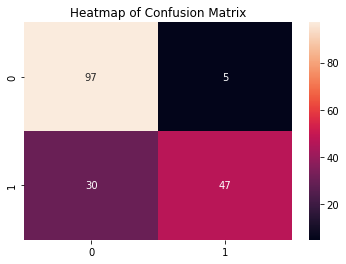

In [100]:
rf_classifier_hp = RandomForestClassifier(bootstrap=True, 
                       criterion='entropy', min_samples_split=30, max_depth=20, min_samples_leaf=4, n_estimators=100,
                       random_state=51)
rf_classifier_hp.fit(X_train, y_train)
y_pred_hp = rf_classifier_hp.predict(X_test)
accuracy_score(y_test, y_pred_hp)

print("Random Forest Train Score -- Hyper-Parameter",rf_classifier_hp.score(X_train, y_train))
print("Random Forest Test Score -- Hyper-Parameter",rf_classifier_hp.score(X_test, y_test))
print("*****"*10)

print(classification_report(y_test, y_pred_hp))
print("*****"*10)



cm = confusion_matrix(y_test, y_pred_hp )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

###### lightgbm

In [101]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [103]:
#  params = {'metric':FIXED_PARAMS['metric'],
#              'objective':FIXED_PARAMS['objective'],
#              **search_params}

lightgbm Train Score 0.9606741573033708
lightgbm Test Score 0.776536312849162
**************************************************
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82       102
         1.0       0.82      0.61      0.70        77

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.76       179
weighted avg       0.78      0.78      0.77       179

**************************************************


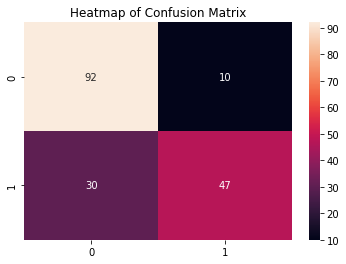

In [104]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
predictions_clf =clf.predict(X_test)

print("lightgbm Train Score",clf.score(X_train, y_train))
print("lightgbm Test Score",clf.score(X_test, y_test))
print("*****"*10)

print(classification_report(y_test, predictions_clf))
print("*****"*10)

cm = confusion_matrix(y_test, predictions_clf )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [ ]:
# Overfitting 

In [105]:
PassengerId

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [106]:
PassengerId.shape

(418,)

In [108]:
X_final = test_dt.iloc[:,:].values

In [109]:
y_final = rf_classifier_hp.predict(X_final)

In [111]:
y_final.shape

(418,)

In [110]:
y_final

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [112]:
df_final = pd.DataFrame()

In [113]:
df_final["PassengerId"] = PassengerId
df_final["Survived"] = y_final

In [114]:
df_final.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [116]:
df_final.to_csv("submission.csv", index=False)